In [1]:
import torch
from PIL import Image

device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

raw_image = Image.open("/home/xiaolong/LAVIS/docs/_static/Confusing-Pictures.jpg").convert("RGB")

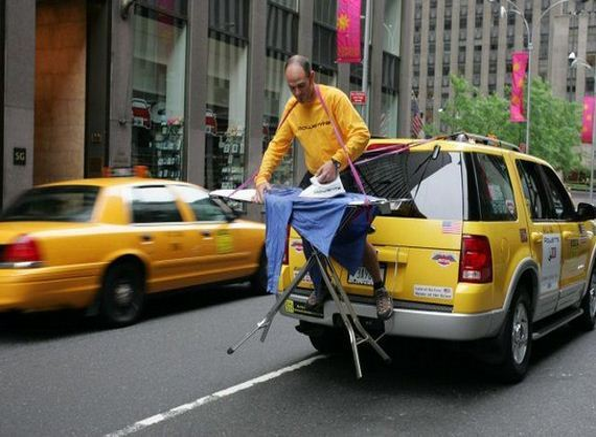

In [2]:
display(raw_image.resize((596, 437)))

In [3]:
from lavis.models import load_model_and_preprocess
model, vis_processors, _ = load_model_and_preprocess(name="blip2_vicuna_instruct", model_type="vicuna13b", is_eval=True, device=device)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

/home/xiaolong/miniconda3/envs/lavis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:19<00:00,  6.65s/it]


In [4]:
model.generate({"image": image, "prompt": "What is unusual about this image?"})

['In this image, a man in a yellow shirt is standing on the back of a yellow taxi while it is driving through a busy city street. This is an unusual sight because it is not common for people to stand on the back of a moving vehicle, especially a taxi, while it is in motion. It raises questions about the safety and legality of such an action, as well as the potential risks involved for both the driver and the person standing on the back of the taxi.']

In [5]:
model.generate({"image": image, "prompt": "Write a short description for the image."})

['a man in a yellow shirt is standing on top of a car']

In [6]:
model.generate({"image": image, "prompt": "Write a detailed description."})

["A man in a yellow shirt is standing on the back of a parked car in the middle of a busy city street. He appears to be doing laundry by hanging his clothes out to dry on the car's roof rack. There are several cars and taxis in the background, adding to the bustling atmosphere of the scene. The man seems to be taking advantage of the opportunity to do his laundry while waiting for traffic to clear up."]

In [7]:
model.generate({"image": image, "prompt": "write a story of the picture."})

['a man in a yellow shirt is standing on top of a car']